Üdvözöljük a Pokémon adatelemzés izgalmas világában! \
Ebben a laborban egy kalandba kezdünk, amely tele van adatok lekérdezésével, szűrésével és rendezésével a Pandák erejét használva.

Képzelje el magát Pokémon-oktatóként, aki készen áll arra, hogy elmerüljön a Pokémon statisztikák hatalmas univerzumában. 
Mielőtt azonban nekivágnánk az utazásnak, szánjunk egy percet arra, hogy megismerkedjünk megbízható társunkkal, az adatkészlettel.

A rendelkezésünkre álló adatkészlet rengeteg információt tartalmaz a Pokémonokról. Olyan részleteket tartalmaz, mint a Pokémon neve, 
elsődleges és másodlagos típusa (ha van), teljes statisztikai pontszám, HP, támadás, védelem, különleges támadás, különleges védelem, 
sebesség, generáció, és hogy legendásnak számítanak-e. Ezek a tulajdonságok betekintést nyújtanak képességeikbe, erősségeikbe, gyengeségeikbe és általános erejükbe.

Ebben a laborban a következő panda módszereket fogjuk használni:

     df.loc
     df.iloc
     df.query
     df.sort_values

Csináljunk egy kis felfedezést együtt. Nyugodtan hagyja ki ezt a részt, és ugorjon a tevékenységekhez.

Összeállítottunk néhány egyszerű vizualizációt az adatkészlet jobb megértése érdekében. Szánjon rá időt, hogy elmerüljön benne, és ha készen áll, kezdje a tevékenységekkel!

In [1]:
import pandas as pd, random as rd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
basepath = r'..\..\source'
inputfile = r'\pokemon.csv'
outfile = r''
outpath = r''
df = pd.read_csv(basepath + inputfile)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe()

Distribution of pokemon types

<Axes: ylabel='count'>

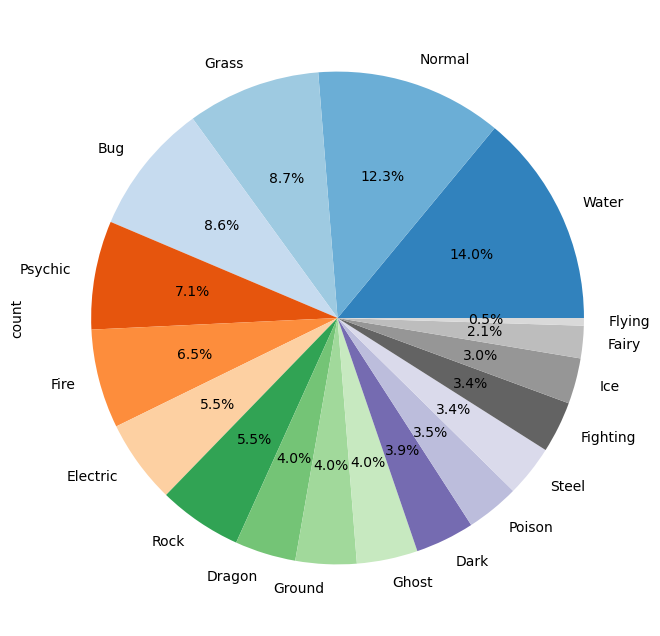

In [5]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', 
                                 figsize=(10, 8))

Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

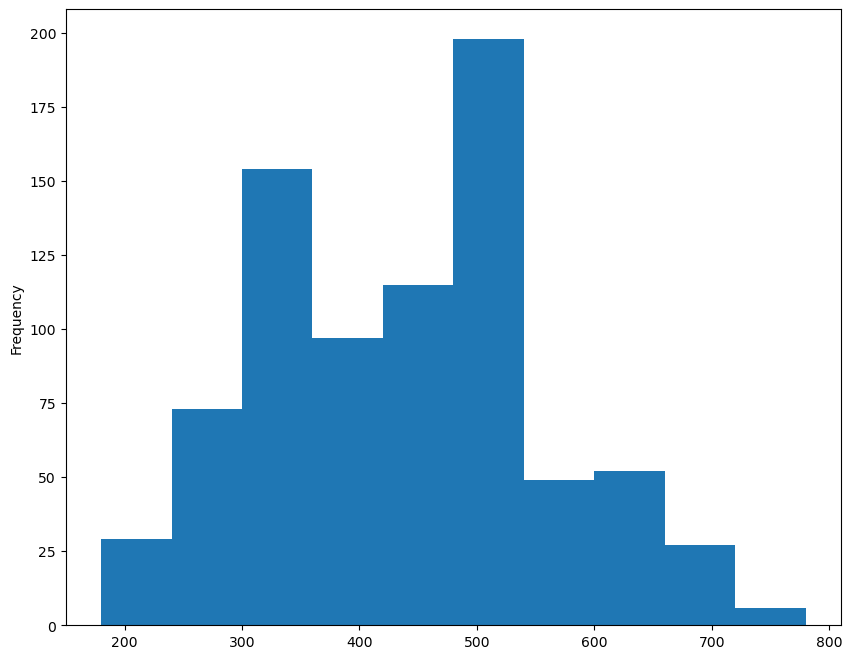

In [6]:
df['Total'].plot(kind='hist', figsize=(10, 8))

<Axes: >

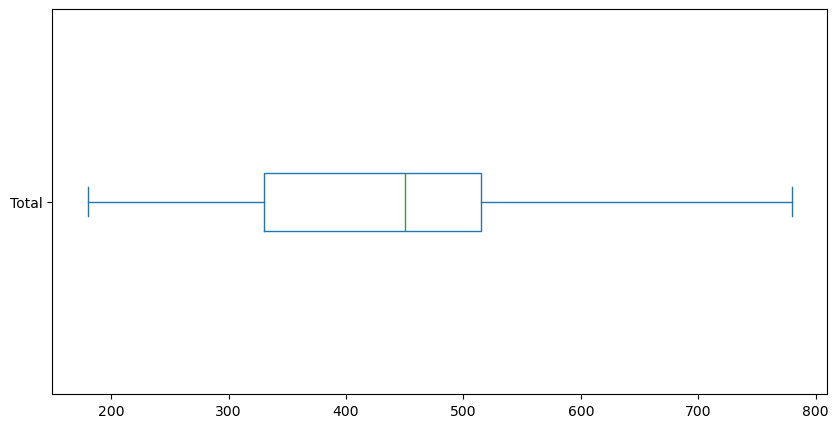

In [7]:
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

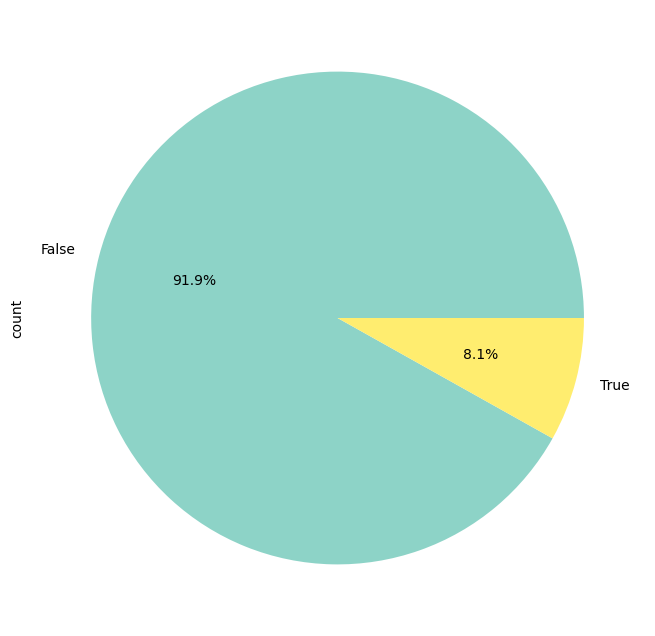

In [8]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', 
                                    figsize=(10, 8))

Basic filtering

Let's start with a few simple activities regarding filtering.
1. How many Pokemons exist with an Attack value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:


<Axes: xlabel='Attack'>

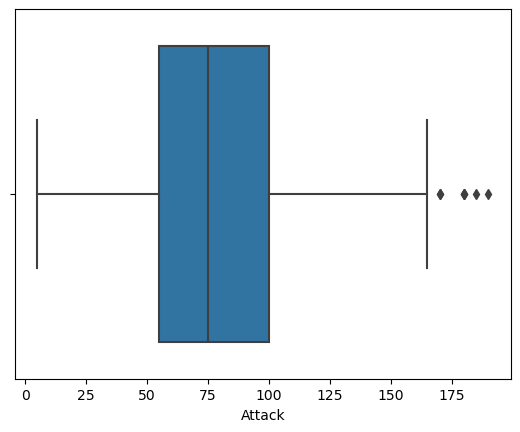

In [9]:
sns.boxplot(data=df, x='Attack')

In [10]:
df.loc[df['Attack'] > 150, 'Name'].count()

18

In [17]:
(df['Attack'] > 150).sum()

18

In [13]:
df.query(
    "Attack > 150"
).count()

#             18
Name          18
Type 1        18
Type 2        13
Total         18
HP            18
Attack        18
Defense       18
Sp. Atk       18
Sp. Def       18
Speed         18
Generation    18
Legendary     18
dtype: int64

Válaszd ki az összes pokemont aminek a Speed értéke 10 vagy kevesebb

In [14]:
df.query("Speed <=10")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


In [15]:
df.loc[df['Speed'] <= 10]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


3. Hány pokemon spDef értéke 25 vagy kevesebb?

In [ ]:
df.query("`Sp. Def` <= 25").count()

In [18]:
(df['Sp. Def'] <= 25).sum()

18

In [16]:
df.loc[df['Sp. Def'] <= 25].count()

#             18
Name          18
Type 1        18
Type 2         6
Total         18
HP            18
Attack        18
Defense       18
Sp. Atk       18
Sp. Def       18
Speed         18
Generation    18
Legendary     18
dtype: int64

4. Select all the Legendary pokemons

In [ ]:
legendary_df = df.loc[df['Legendary'] == True]

In [19]:
legendary_df = df.loc[df['Legendary']]

In [20]:
not_legendary_df = df.loc[~df['Legendary']] #negálás

5. Find the outlier

Find the pokemon that is clearly an outlier in terms of Attack / Defense:


Text(150, 10, "Who's this guy?")

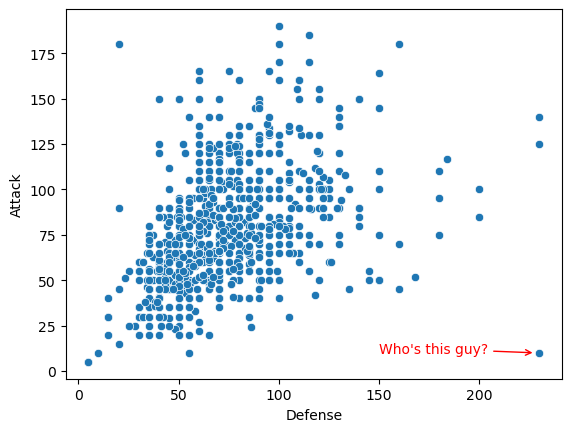

In [21]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [22]:
# A defense > 200 és Attack < 25
df.loc[
    (df['Attack'] < 25) &
    (df['Defense'] > 200)
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [25]:
df.sort_values(by=['Defense', 'Attack'], ascending=[False, True]).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


6. How many Fire-Flying Pokemons are there?

In [23]:
df.loc[
    (df['Type 1'] == 'Fire') &
    (df['Type 2'] == 'Flying')
].count()

#             6
Name          6
Type 1        6
Type 2        6
Total         6
HP            6
Attack        6
Defense       6
Sp. Atk       6
Sp. Def       6
Speed         6
Generation    6
Legendary     6
dtype: int64

In [26]:
(
    (df['Type 1'] == 'Fire') &
    (df['Type 2'] == 'Flying')
).sum()

6

7. How many 'Poison' pokemons are across both types?

In [27]:
(
    (df['Type 1'] == 'Poison') |
    (df['Type 2'] == 'Poison')
).sum()

62

8. Name the pokemon of Type 1 Ice which has the strongest defense?

In [29]:
df.loc[
    df['Type 1'] == 'Ice'
    ].sort_values(by=['Defense'], ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


9. What's the most common type of Legendary Pokemons?

In [37]:
df.loc[df['Legendary'], 'Type 1'].value_counts()
#df['Type 1', df['Legendary']].value_counts()

Type 1
Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64

10. What's the most powerful pokemon from the first 3 generations, of type water?

In [40]:
df.loc[
    (df['Generation'] <=3) & (df['Type 1'] == 'Water')
    ].sort_values(by=['Total'], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
293,270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,False
209,194,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False


11. What's the most powerful Dragon from the last two generations?

In [43]:
df['Generation'].max()

6

In [48]:
df.loc[
    (df['Generation'] >= 5 ) & 
    ((df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon'))
    ].sort_values(by=['Total'], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
673,612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False


12. Select most powerful Fire-type pokemons

In [50]:
df.loc[
    (df['Attack'] > 100 ) & 
    ((df['Type 1'] == 'Fire'))
    ]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


13. Select all Water-type, Flying-type pokemons

In [51]:
df.loc[
    (df['Type 1'] == 'Water' ) & 
    (df['Type 2'] == 'Flying')
    ]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


14. Select specific columns of Legendary pokemons of type Fire

In [55]:
df.loc[
    (df['Type 1'] == 'Fire' ) & 
    (df['Legendary'])
    , ['Name', 'Attack', 'Generation']]

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


15. Select Slow and Fast pokemons \
Take a look at the distribution of Pokemon's speed in the histogram included in the notebook. The red lines separate the slowest (bottom 5%) and fastest (top 5%) pokemons.

Select those pokemons that are either very slow (with Speed below the bottom 5%) or very fast (Speed above top 95%).

This is the distribution of speed of the pokemons. The red lines indicate those bottom 5% and top 5% pokemons by speed:

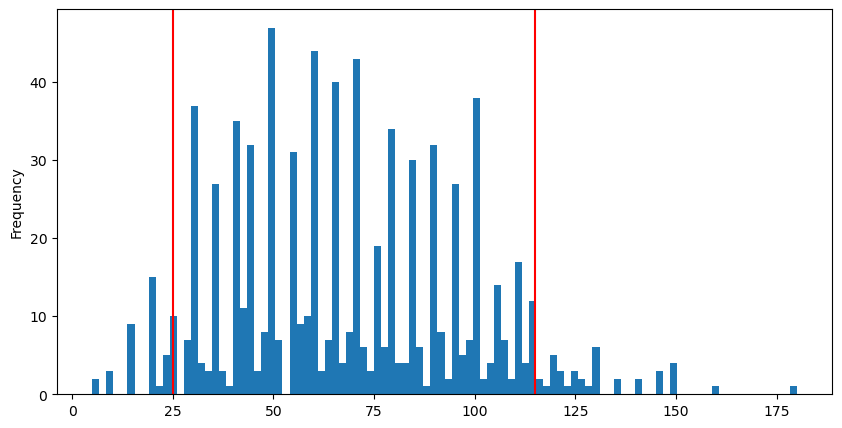

In [56]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [60]:
df.loc[
    (df['Speed'] < df['Speed'].quantile(.05)) |
    (df['Speed'] > df['Speed'].quantile(.95))
]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
752,682,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False


16. Find the Ultra Powerful Legendary Pokemon \
Take a look at the scatter plot correlating Defense to Attack. What's the Name of the pokemon indicated by the red arrow in the image below?

Text(160, 150, "Who's this guy?")

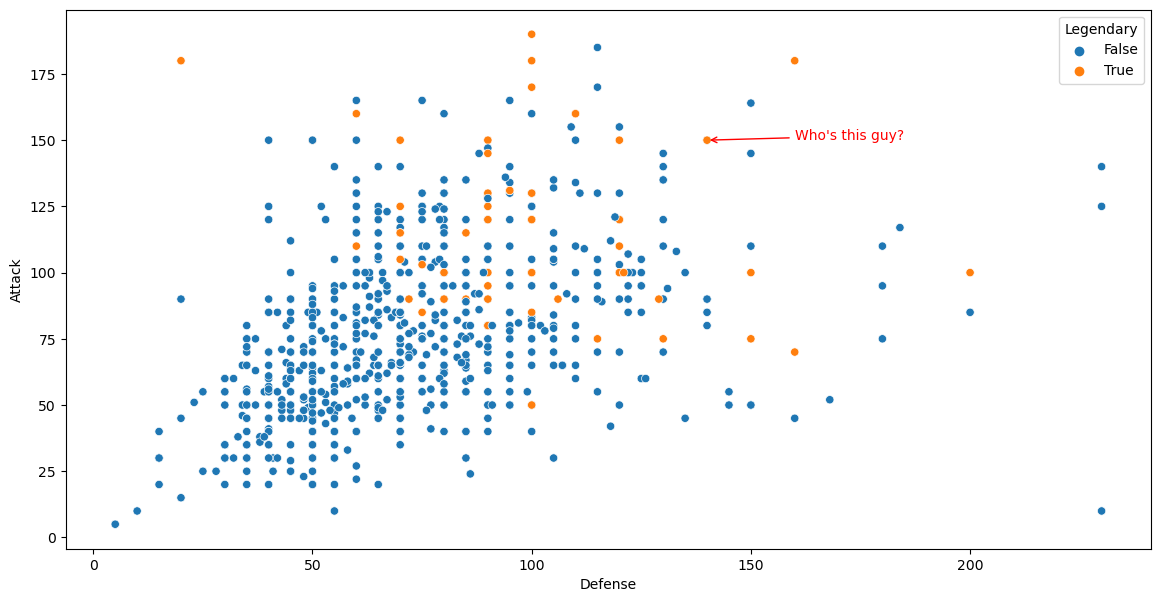

In [61]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

Nehéz megbecsülni az adatpont Védelem értékét, mivel a szórásdiagram tengelye nem rendelkezik szemcsés értékekkel. De szűkíthetjük a keresést úgy, hogy először megnézzük az összes legendás pokémont, és azokat, amelyek támadása meghaladja a 140-et. Ezután az, amelyik a legerősebb védelemmel rendelkezik:

In [62]:
df.loc[
    df['Legendary'] &
    (df['Attack'] > 140)
, ['Name', 'Attack', 'Defense']].sort_values(by=['Defense'], ascending=False)

,Name,Attack,Defense
424,GroudonPrimal Groudon,180,160
423,Groudon,150,140
707,Zekrom,150,120
543,Regigigas,160,110
796,DiancieMega Diancie,160,110
163,MewtwoMega Mewtwo X,190,100
426,RayquazaMega Rayquaza,180,100
711,KyuremBlack Kyurem,170,100
422,KyogrePrimal Kyogre,150,90
425,Rayquaza,150,90
